In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy
import seaborn as sns
sns.set_context("talk")

In [7]:
animal = '91R2'
group = 'agg'
df = load_and_wrangle(mouseId=animal, group=group, path=None, overwrite=False)
df.head()

,subject,group,other,day,trial,PrL (E),PrL (I),vLS (E),vLS (I),POA (E),...,PAG (E),PMv (E),PMv (I),LHb (E),LHb (I),PA (E),PA (I),NAc (DA),unsupervised labels,attack labels
0,91R2,agg,balbc,d1,t1,3.487601,4.244768,1.063980,0.661043,-1.450333,...,1.633166,-0.983681,-0.854403,2.522917,-0.074778,-0.413440,-1.324116,-0.508740,3.0,0
1,91R2,agg,balbc,d1,t1,3.654724,4.905359,1.792392,0.701188,-1.062802,...,2.260362,-0.964178,-1.028227,2.955714,0.066831,0.220325,-0.832742,-0.281556,3.0,0
2,91R2,agg,balbc,d1,t1,3.786603,5.531448,2.533477,0.840870,-0.639739,...,2.790893,-0.871848,-1.128296,3.374386,0.250390,0.793698,-0.371332,-0.056928,3.0,0
3,91R2,agg,balbc,d1,t1,3.885907,6.122472,3.280577,1.070166,-0.187927,...,3.230938,-0.715391,-1.160791,3.776990,0.470736,1.309244,0.060587,0.164503,3.0,0
4,91R2,agg,balbc,d1,t1,3.955306,6.677867,4.027034,1.379151,0.285857,...,3.586675,-0.503507,-1.131896,4.161584,0.722711,1.769527,0.463485,0.382100,6.0,0


536881
Variance for each brain region
[-1.63188062e-08 -3.93903253e-06 -3.94247316e-06 -4.05683115e-06
 -1.35977496e-06 -9.57105661e-06 -2.45118277e-06 -9.79689894e-06
 -8.49757917e-06 -8.10580072e-06 -3.04167308e-06 -4.06700316e-06
 -4.38470028e-06 -6.60681129e-06  2.61534092e-06 -4.76946499e-06
 -5.60475502e-06 -4.70211810e-06 -8.89703316e-06  5.27192542e-08
 -4.76500764e-07  5.12321071e-07]


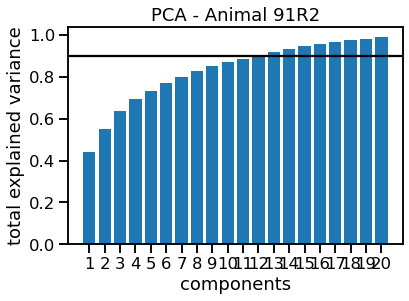

In [15]:
def PCAfunction(animal, group='agg', filter_agg=False, path=None):
    df = load_and_wrangle(mouseId=animal, group=group, path=path, overwrite=False)

    # filter for aggression or not
    if filter_agg == False:
        temp = df.drop(columns=['subject','group','other','day','trial','unsupervised labels', 'attack labels'])
    else:
        temp = df[df['attack labels']==1]
        temp = temp.drop(columns=['subject','group','other','day','trial','unsupervised labels', 'attack labels'])
    
    # preparing matrix X
    x = np.array(temp)
    print("Variance for each brain region")
    print(x.mean(axis=0))

    n_comp=20
    pca = PCA(n_components=n_comp)
    y = pca.fit_transform(x)
    c_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure()
    plt.title(f'PCA - Animal {animal}')
    plt.ylabel("total explained variance")
    plt.xlabel('components')
    plt.bar(range(1,n_comp+1),c_explained_variance)
    plt.xticks(range(1,n_comp+1))
    plt.axhline(0.9,color='black')
    plt.show()

PCAfunction(animal, group=group, filter_agg=False, path=None)